In [239]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [240]:
df=pd.read_csv('car_evaluation.csv')

In [241]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [242]:
df.shape

(1727, 7)

In [243]:
#lets rename column names and make column names meaningful

col_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns=col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [245]:
# need to change the datatype of doors,persons
df.value_counts()


buying  maint  doors  persons  lug_boot  safety  class
vhigh   vhigh  5more  more     small     med     unacc    1
high    high   2      2        big       high    unacc    1
                                         low     unacc    1
                                         med     unacc    1
                               med       high    unacc    1
                                                         ..
                      more     big       low     unacc    1
                                         high    acc      1
                      4        small     med     unacc    1
                                         low     unacc    1
                                         high    acc      1
Name: count, Length: 1727, dtype: int64

In [246]:
df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [247]:
df['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [248]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [249]:
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [250]:
df['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [251]:
df['safety'].unique()

array(['med', 'high', 'low'], dtype=object)

In [252]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [253]:
for col in col_names:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [254]:
# Summary of variables
# There are 7 variables in the dataset. All the variables are of categorical data type.
# These are given by buying, maint, doors, persons, lug_boot, safety and class.
# class is the target variable.

In [255]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [256]:
# target variable "class" is ordinal in nature

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [257]:
# There are no missing values in the dataset

# let's declare feature and target variable 

X=df.drop(['class'],axis=1)
y=df['class']

In [258]:
# split data into seperate training and testing data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)


In [259]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [260]:
# Feature Engineering

X_train.dtypes


buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [261]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [262]:
# lets encode categorical variables and we see all columns are categorical 

#import category encoders

import category_encoders as ce

encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])

X_train=encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [263]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [264]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


In [265]:
#import decision tree classifier with criterion gini index

from sklearn.tree import DecisionTreeClassifier


In [266]:
# instantiate the decision tree classifier model with criterion gini index

clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

#fit the model
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [267]:
y_pred_gini=clf_gini.predict(X_test)

In [268]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criterion gini index: 0.8053


In [269]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      shape=(1157,), dtype=object)

In [270]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7848


In [271]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7848
Test set score: 0.8053


In [272]:
# Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. 
# These two values are quite comparable. 
# So, there is no sign of overfitting.



[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

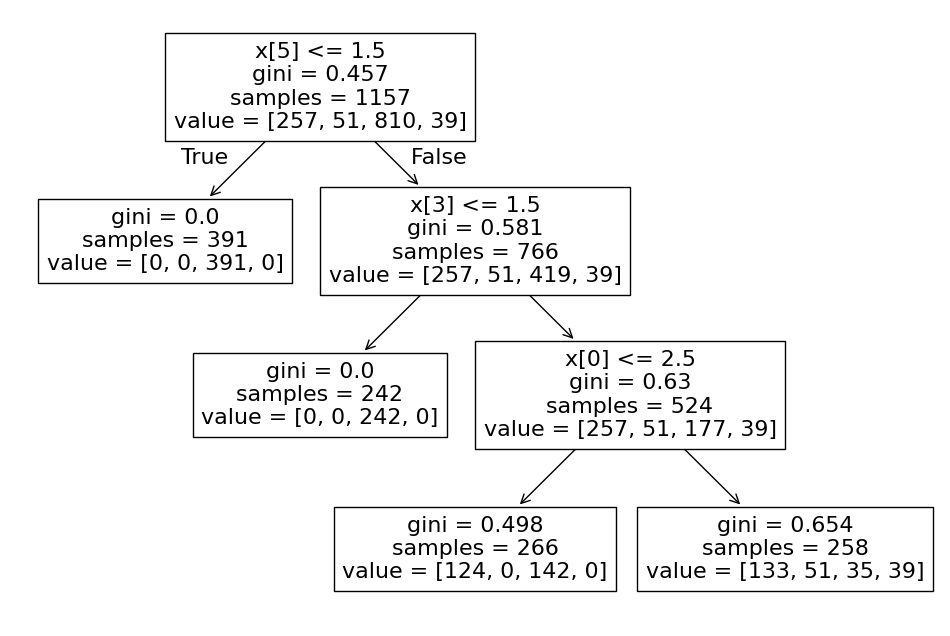

In [273]:
# Visualise the decision tree

plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train,y_train))

In [275]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [276]:
y_pred_en = clf_en.predict(X_test)

In [277]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8053


In [278]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      shape=(1157,), dtype=object)

In [279]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7848


In [280]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7848
Test set score: 0.8053


In [ ]:
# We can see that the training-set score and test-set score is same as above.
# The training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021.
# These two values are quite comparable. So, there is no sign of overfitting.

[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.5\nentropy = 1.484\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\nentropy = 1.639\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'entropy = 0.997\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.758\nsamples = 258\nvalue = [133, 51, 35, 39]')]

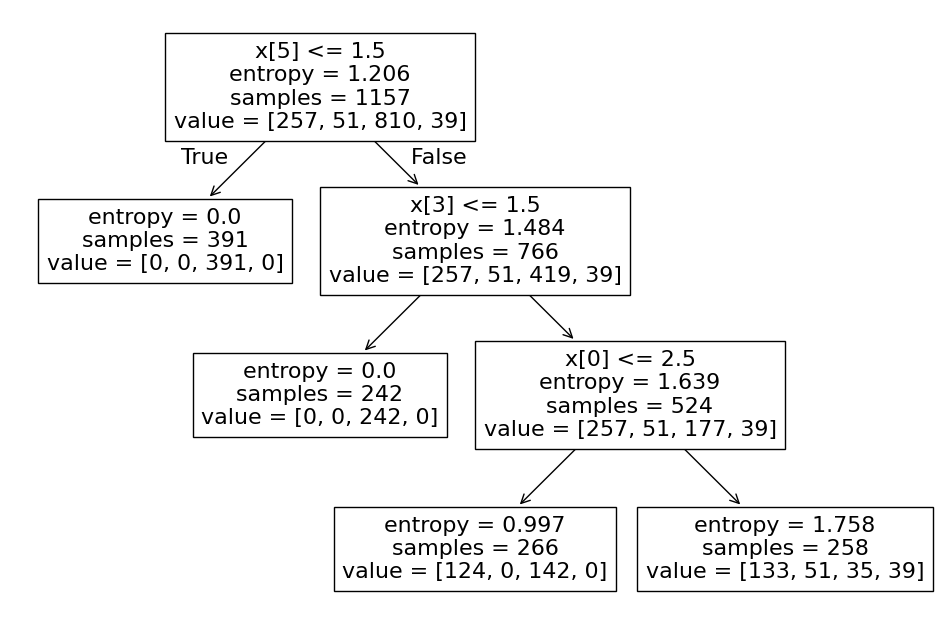

In [281]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [282]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]


In [283]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.56      0.56       127
        good       0.00      0.00      0.00        18
       unacc       0.87      0.97      0.92       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.81       570
   macro avg       0.36      0.38      0.37       570
weighted avg       0.74      0.81      0.77       570



c:\Users\Priyanka\Machine learning- Tutorials\new-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Priyanka\Machine learning- Tutorials\new-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Priyanka\Machine learning- Tutorials\new-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif